In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

C:\Users\Joanne\anaconda3\envs\hvplot_dev\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
#Get the stock quote 
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17') 

In [3]:
#show data
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-04,65.827499,65.169998,65.267502,65.434998,67181600.0,64.668098
2019-12-05,66.472504,65.682503,65.947502,66.394997,74424400.0,65.616837
2019-12-06,67.750000,66.824997,66.870003,67.677498,106075600.0,66.884315
2019-12-09,67.699997,66.227501,67.500000,66.730003,128042400.0,65.947929
2019-12-10,67.517502,66.464996,67.150002,67.120003,90420400.0,66.333351
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.899139
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,67.069626
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.981300
2019-12-16,70.197502,69.245003,69.250000,69.964996,128186000.0,69.144997


In [4]:
# get the number of rows and colums inthe data set
df.shape

(2003, 6)

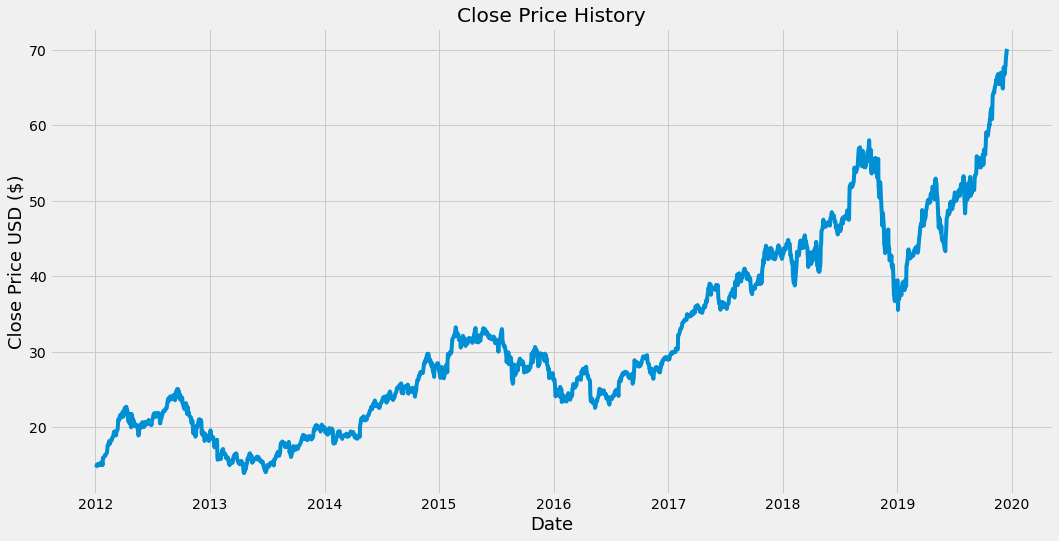

In [5]:
# visulize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [6]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 

In [7]:
# Using MinMaxScaler from sklearn to scale the data betweek 0 and 1
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)


In [8]:
scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [9]:
# create the training datae set
#create the scled training date set
train_data = scaled_data[0:training_data_len, :]


In [10]:
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [11]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1543, 60, 1)

In [13]:
#Build the LSTM network model
model = Sequential()

# Layer 1 
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))

# Layer 2
model.add(LSTM(units=50, return_sequences=False))

#Output layers
model.add(Dense(units=25))
model.add(Dense(units=1))

In [14]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Training the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

1543/1543 [==============================] - 49s 19ms/step - loss: 0.0015


In [17]:
# Create the testing data set
# Crete a new array containing scaled valueds from index 1543 to 2003
test_data = scaled_data[training_data_len -60:,:]

In [18]:
# Create the data sets x_test and y_test

In [19]:
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [20]:
# convert the data to a numpy array
x_test = np.array(x_test)

In [21]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [22]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [23]:
# Get the root mean squrared erro(RMSE)--how accurate the model to predit the response, the standard deviatation of the residules. 
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

1.922222705721399

In [24]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions


C:\Users\Joanne\anaconda3\envs\hvplot_dev\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


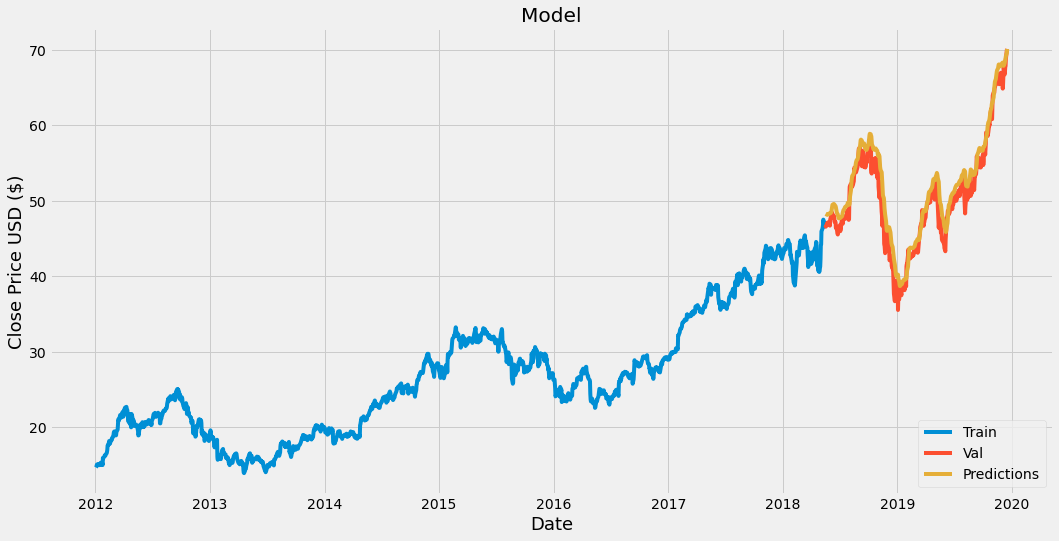

In [25]:
#Visualize the data
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [26]:
# show the valid (actural and predicted price)
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,48.267113
2018-05-18,46.577499,48.248306
2018-05-21,46.907501,48.178459
2018-05-22,46.790001,48.155186
2018-05-23,47.090000,48.138470
...,...,...
2019-12-11,67.692497,68.618439
2019-12-12,67.864998,68.891304
2019-12-13,68.787498,69.166275


<AxesSubplot:xlabel='Date'>

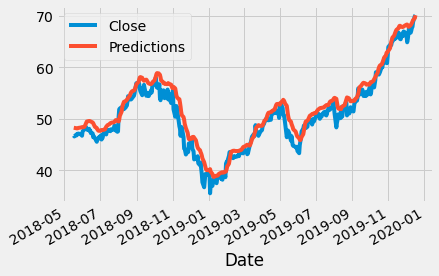

In [27]:
valid.plot()

In [28]:
# get the quote 

In [29]:

#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-07-26')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[132.34395]]


In [30]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2021-07-27')
print(apple_quote2['Close'])

Date
2019-12-18     69.934998
2019-12-19     70.004997
2019-12-20     69.860001
2019-12-23     71.000000
2019-12-24     71.067497
                 ...    
2021-07-21    145.399994
2021-07-22    146.800003
2021-07-23    148.559998
2021-07-26    148.990005
2021-07-27    146.770004
Name: Close, Length: 404, dtype: float64
